<a href="https://colab.research.google.com/github/prakash888kp/EnsembleDiseaseDetection/blob/main/Ensemble_Crop_Recommender_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop recommendation using Ensemble Learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from pickle import dump

**Importing the data**

In [ ]:
data = pd.read_csv(r'/contents/crop.csv')
data.reset_index(drop = True, inplace = True)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Shape of the data**

In [ ]:
data.shape

(2200, 8)

**Checking missing values**

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Data types**

In [ ]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**Checking the unique targets in the dataframe**

In [ ]:
data['label'].nunique()

22

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


**Handling missing values**

In [ ]:
# Indices of rows where N is 0.
ind = list(data[data['N'] == 0].index)
len(ind)

27

In [ ]:
# Dropping rows with missing values.
data.drop(ind, inplace = True)
data.reset_index(drop = True, inplace = True)
data.shape

(2173, 8)

**Features correlation**

<AxesSubplot:>

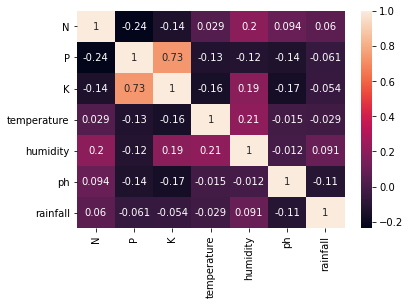

In [ ]:
# Correlation heatmap.
sns.heatmap(data.corr(), annot = True)

In [ ]:
target = data['label']
features_name = data.drop(columns = ['label', 'N','K','P'])# Dropping NPK 
features = features_name.values

In [ ]:
features

array([[ 90.        ,  43.        ,  20.87974371,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  41.        ,  21.77046169,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  44.        ,  23.00445915,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  30.        ,  24.13179691,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  34.        ,  26.2724184 ,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  30.        ,  23.60301571,  60.39647474,
          6.77983261, 140.9370415 ]])

In [ ]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2168    coffee
2169    coffee
2170    coffee
2171    coffee
2172    coffee
Name: label, Length: 2173, dtype: object

In [ ]:
LE = pre.LabelEncoder()
target = LE.fit_transform(target)
target

array([20, 20, 20, ...,  5,  5,  5])

In [ ]:
np.unique(target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [ ]:
# Saving the encoder for inverse transforming the predictions.
dump(LE, open('label.pkl', 'wb'))

In [ ]:
# Splitting into 80% training dataset and 20% testing dataset.
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2)

In [ ]:
print('Train data shape:', (X_train.shape))
print('Test data shape:', (X_test.shape))

Train data shape: (1738, 6)
Test data shape: (435, 6)


In [ ]:
np.unique(Y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 array([78, 77, 81, 86, 82, 77, 75, 81, 81, 74, 76, 77, 73, 82, 79, 80, 80,
        79, 84, 79, 79, 78], dtype=int64))

In [ ]:
# Robust sacler is used as there may be some outliers in the data.
scaler = pre.RobustScaler()
# Train data
#train_scaled = scaler.fit_transform(X_train)
scaler.fit(X_train)
train_scaled = scaler.transform(X_train)
train_scaled

array([[-0.03174603, -0.60714286,  0.52303123, -0.64834263,  3.67276079,
        -0.48078895],
       [-0.06349206, -0.85714286, -0.80257196,  0.41905453,  1.32261936,
         0.24957973],
       [-0.0952381 , -0.32142857,  1.00200192, -1.51231418, -0.78936572,
         1.28639182],
       ...,
       [-0.22222222, -0.25      ,  0.93398365, -1.11631122,  0.68853074,
        -0.06475542],
       [-0.04761905, -0.39285714,  0.43483972,  0.07156375, -0.13616488,
        -0.94596382],
       [-0.17460317, -0.53571429,  0.49692187,  0.28462109, -0.15161053,
        -0.74345978]])

In [ ]:
# Test data
test_scaled = scaler.transform(X_test)
test_scaled

array([[ 0.00000000e+00, -1.42857143e-01, -1.04787943e-02,
         4.64334335e-01, -7.07680160e-01,  2.09371080e+00],
       [ 1.00000000e+00,  7.50000000e-01,  5.84253241e-01,
         4.51193255e-01, -3.25655690e-01, -1.16252589e+00],
       [ 5.87301587e-01, -3.21428571e-01,  4.82569979e-02,
        -6.23406850e-01, -9.66367916e-02,  6.94061401e-02],
       ...,
       [ 3.17460317e-02, -3.57142857e-01,  6.34517264e-01,
        -6.69959008e-01,  2.77153662e+00, -9.94286983e-01],
       [-4.60317460e-01,  0.00000000e+00,  7.05122419e-01,
        -1.13178521e+00, -1.49942947e+00, -6.32394082e-02],
       [ 9.04761905e-01,  1.78571429e-01, -1.33037950e-03,
         6.39783654e-03,  5.53672615e-01,  1.85461106e+00]])

In [ ]:
# Saving the scaler for scaling the inputs for prediction.
dump(scaler, open('scaler.pkl', 'wb'))

The classification techniques used for classifcation of the crops are: <br>
**1.** *k-nearest neigbors.* <br>
**2.** *Decision Tree.* <br>
**3.** *Random Forest Classifier.* <br>
**4.** *Gaussian Naive Bayes.* <br>
These algorithms will then be used for the **ensemble learning model**.

In [ ]:
# Instantiating the classifiers.
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

**Voting classifier**

In [ ]:
# Ensemble learning model.
ensemble = VotingClassifier(
                            estimators = [('knn', knn), ('dtc', dtc), ('rfc', rfc), ('gnb', gnb)],
                            voting = 'hard')

In [ ]:
# Training the model.
ensemble.fit(train_scaled, Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('gnb', GaussianNB())])

In [ ]:
# Predicting on the test set.
Y_pred = ensemble.predict(test_scaled)

**Model performance**

In [ ]:
print("The accuracy of the model is: %.4f" % metrics.accuracy_score(Y_test, Y_pred))

The accuracy of the model is: 0.9977


In [ ]:
dump(ensemble, open('ensemble.pkl', 'wb'))

In [ ]:
predicted_df = pd.DataFrame(data = X_test, columns = features_name.columns)
predicted_df['Actual'] = LE.inverse_transform(Y_test)
predicted_df['Predicted'] = LE.inverse_transform(Y_pred)

In [ ]:
predicted_df.sample(10)

,N,K,temperature,humidity,ph,rainfall,Actual,Predicted
243,49.0,51.0,24.872121,93.905601,6.676579,135.169452,papaya,papaya
387,108.0,31.0,24.128325,56.181077,6.431900,147.275782,coffee,coffee
8,27.0,19.0,20.934099,21.189301,5.562202,133.191442,kidneybeans,kidneybeans
149,8.0,26.0,25.547599,91.641948,5.702485,212.867626,coconut,coconut
358,9.0,32.0,32.269353,53.560928,5.870116,95.940354,mango,mango
253,59.0,17.0,28.546224,66.313941,7.368319,62.834699,blackgram,blackgram
87,94.0,40.0,20.277744,82.894086,5.718627,241.974195,rice,rice
10,32.0,15.0,23.909101,20.746193,5.706199,81.602112,kidneybeans,kidneybeans
89,33.0,24.0,35.457905,68.758105,5.269504,108.633305,pigeonpeas,pigeonpeas
143,7.0,9.0,18.879577,92.043045,7.813917,114.665951,orange,orange
